In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# Load the dataset
df = pd.read_csv(r'C:\Users\jastin\Desktop\adm_data_noisy.csv')

In [ ]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'RandomNoise',
       'ConstantValue'],
      dtype='object')


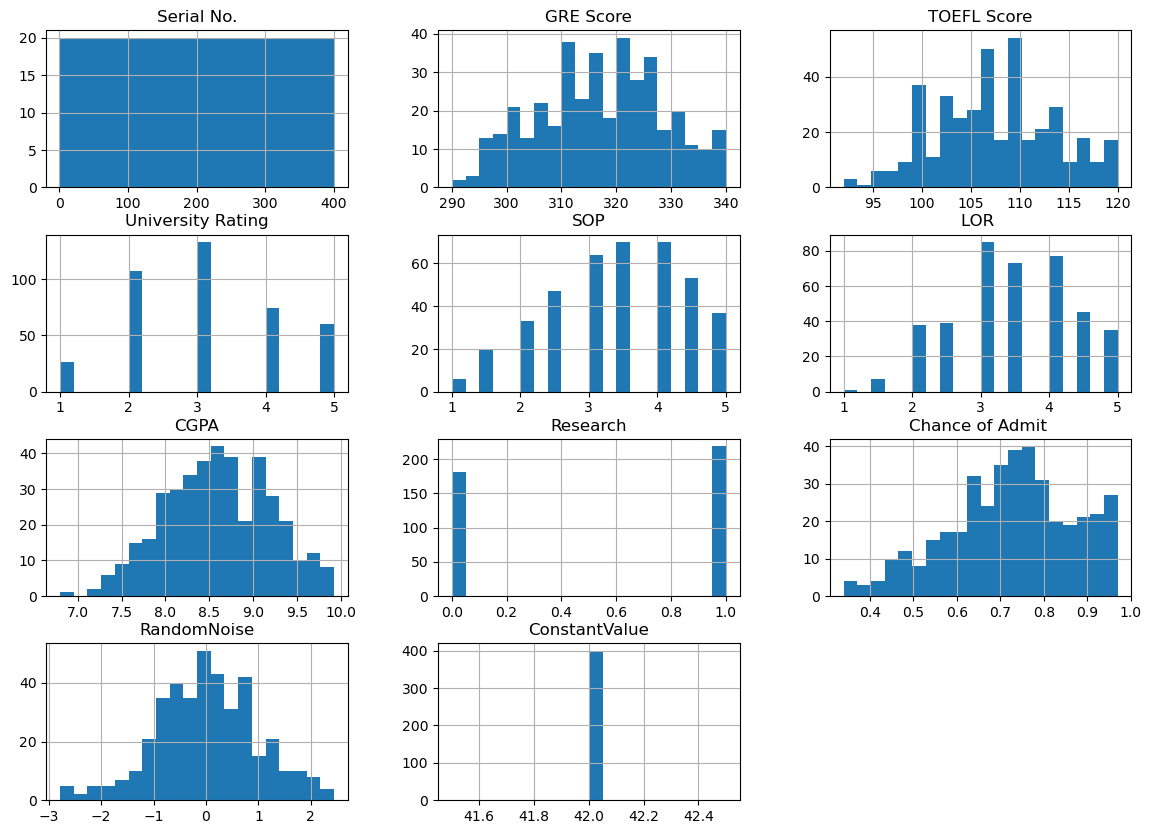

In [ ]:
# Visualize distributions of numerical features
df.hist(bins=20, figsize=(14, 10))
plt.show()

In [ ]:
print(df.head())
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1      337.0          118                  4  4.5   4.5  9.65   
1           2      324.0          107                  4  4.0   4.5  8.87   
2           3      316.0          104                  3  3.0   3.5  8.00   
3           4      322.0          110                  3  3.5   2.5  8.67   
4           5      314.0          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   RandomNoise  ConstantValue  
0         1              0.92     1.275088             42  
1         1              0.76    -0.752376             42  
2         1              0.72    -0.025996             42  
3         1              0.80     1.429222             42  
4         0              0.65     0.591970             42  
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  390.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.

In [ ]:
df = df.fillna(df.mean())
#to clean data

In [ ]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
RandomNoise          0
ConstantValue        0
dtype: int64


In [ ]:
target_column = 'Chance of Admit '  # Adjusted column name based on your dataset

X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2: {r2_lr}')
# error because of not clean yet

Linear Regression MSE: 0.004632622105095477
Linear Regression R^2: 0.8206034297156399


In [ ]:
# Decision Tree Analysis
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt}')
print(f'Decision Tree R^2: {r2_dt}')
# error because of not clean yet

Decision Tree MSE: 0.0080375
Decision Tree R^2: 0.6887507979391236


In [ ]:
# Neural Network Analysis
nn = MLPRegressor(random_state=42, max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

# Evaluate Neural Network
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f'Neural Network MSE: {mse_nn}')
print(f'Neural Network R^2: {r2_nn}')
# error because of not clean yet

Neural Network MSE: 0.045553733012492346
Neural Network R^2: -0.7640513904861517


In [ ]:
# Comparison of the Models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Neural Network'],
    'MSE': [mse_lr, mse_dt, mse_nn],
    'R^2': [r2_lr, r2_dt, r2_nn]
})

print(results)
# error because of not clean yet

               Model       MSE       R^2
0  Linear Regression  0.004633  0.820603
1      Decision Tree  0.008037  0.688751
2     Neural Network  0.045554 -0.764051


In [ ]:
# Assuming you have already fitted your linear regression model 'lr'

# Print feature importance for linear regression
importance_lr = lr.coef_
print("Linear Regression Feature Importance:")
for feature, importance in zip(df.columns[:-1], importance_lr):
    print(f"{feature}: {importance}")


Linear Regression Feature Importance:
Serial No.: 0.00017414770412560197
GRE Score: 0.0019336561192950345
TOEFL Score: 0.0036201153683113494
University Rating: 0.011486414846847166
SOP: 0.001188150934785684
LOR : 0.01628372884956221
CGPA: 0.09994934910674746
Research: 0.020343911005340366
Chance of Admit : -0.004655923713769744
RandomNoise: 0.0


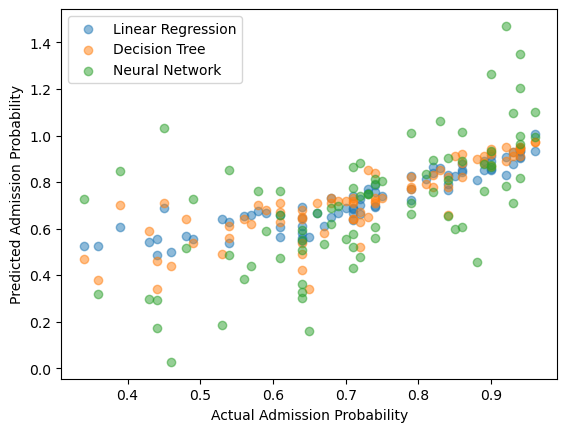

In [ ]:
# Scatter plot for Linear Regression predictions
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_nn, label='Neural Network', alpha=0.5)
plt.xlabel("Actual Admission Probability")
plt.ylabel("Predicted Admission Probability")
plt.legend()
plt.show()

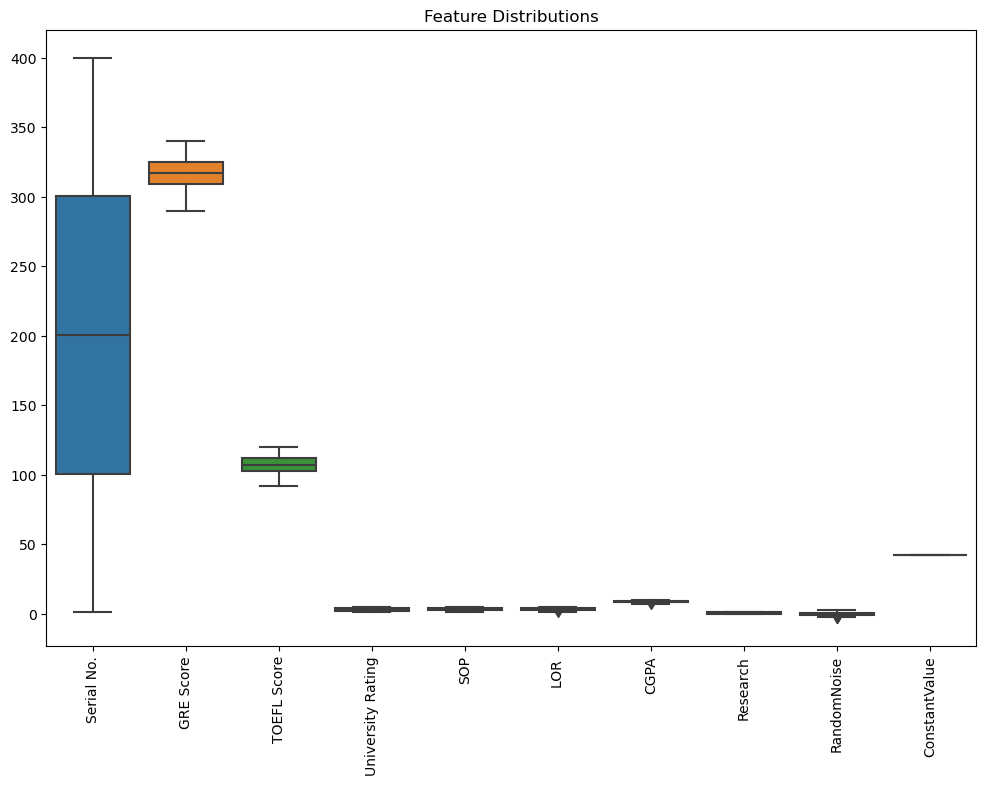

In [ ]:
# Box plot for feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['Chance of Admit ']))  # Corrected column name
plt.xticks(rotation=90)
plt.title('Feature Distributions')
plt.show()


C:\Users\jastin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


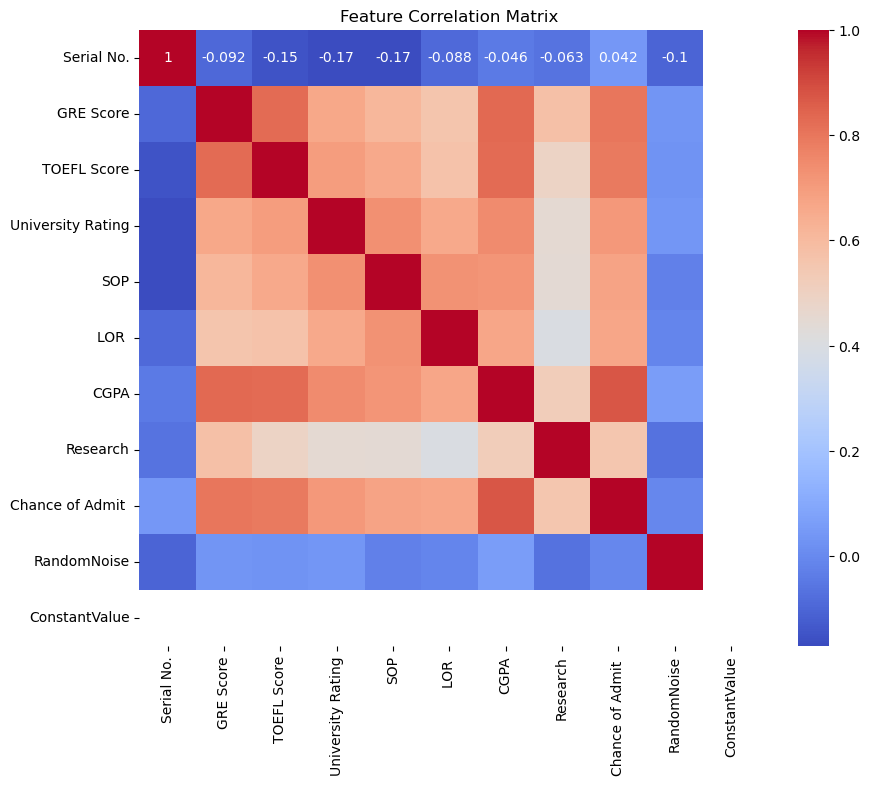

In [ ]:
# Assuming 'df' is your dataframe containing the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()